[ 1.  1. 16.  5.  4.  1.  4.  1.  4.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  4.  1.  2.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  2.  1.  2.
  1.  1.  2.  1.  1.  1.  1.  2.  2.  1.  2.  1.  1.  3.  1.  2.  2.  3.
  2.  3.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  2.  2.
  2.  1.  1.  2.  1.  1.  1.  1.  1.  3.]


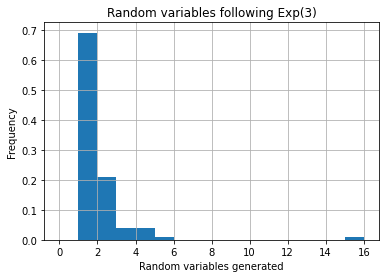

In [12]:
## Geometric Distribution Generator

## Generate random numbers (L'Ecuyer)

import numpy as np 
import matplotlib.pyplot as plt
import math

n = 100
m1 = 2**32 - 209
m2 = 2**32 - 22853

x = np.zeros(n)
y = np.zeros(n)
U = np.zeros(n)   # Generated random numbers 

x[0] = 15
y[0] = 20

## need to choose numbers for x[1],x[2],y[1] & y[2]

x[1] = 8
y[1] = 15

x[2] = 25
y[2] = 5

for i in range(3,n):
    x[i] = (1403580*x[i-2] - 810728*x[i-3]) % m1
    y[i] = (527612*y[i-2] - 1370589*y[i-3]) % m2
    
for i in range(n):
    if x[i]<=y[i]:
        U[i] = (x[i]-y[i]+m1)/(m1+1)
    else:
        U[i] = (x[i]-y[i])/(m1+1)
        
## Generating random variables following Geometric Distribution
# ( using Exp(-ln(1-p)) distribution )

U1 = np.zeros(n)  # 1-U~U(0,1)
p = 0.7    
L = (-1)*np.log(1-p) # Lambda
Y = np.zeros(n)   # Exponential distribution 
X = np.zeros(n)   # Geometric distribution

for i in range(n):
    U1[i] = 1 - U[i]
    Y[i] = (-1/L)*(np.log(U[i]))
    X[i] = math.ceil(Y[i])
#print(Y)
print(X)

## plotting a histogram 

plt.figure(1)
plt.hist(X,bins=range(0,17),density=True)
plt.xlabel("Random variables generated")
plt.ylabel("Frequency")
plt.title("Random variables following Exp(3)")
plt.grid()
plt.show()